# Setup
### Download the Dataset

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2022-10-22 21:09:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘abalone.data’

abalone.data        100%[===================>] 187.38K   562KB/s    in 0.3s    

2022-10-22 21:10:00 (562 KB/s) - ‘abalone.data’ saved [191873/191873]



### Load and Preview the Data

In [4]:
import pandas as pd

column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight',
                'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('abalone.data', names=column_names)
print(f'Number of samples: {len(df)}')
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Data Analysis

In [7]:
import dabl

In [8]:
dabl.detect_types(df)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
sex,False,False,False,True,False,False,False
length,True,False,False,False,False,False,False
diameter,True,False,False,False,False,False,False
height,True,False,False,False,False,False,False
whole_weight,True,False,False,False,False,False,False
shucked_weight,True,False,False,False,False,False,False
viscera_weight,True,False,False,False,False,False,False
shell_weight,True,False,False,False,False,False,False
rings,False,False,True,False,False,False,False


# Preprocessing

In [9]:
df = dabl.clean(df, verbose=1)
df.dtypes

Detected feature types:
continuous      7
dirty_float     0
low_card_int    1
categorical     1
date            0
free_string     0
useless         0
dtype: int64


sex               category
length             float64
diameter           float64
height             float64
whole_weight       float64
shucked_weight     float64
viscera_weight     float64
shell_weight       float64
rings                int64
dtype: object

/home/codespace/.python/current/lib/python3.10/site-packages/dabl/plot/supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
/home/codespace/.python/current/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column rings.
  warn("Dropped {} outliers in column {}.".format(


Target looks like regression


/home/codespace/.python/current/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column shell_weight.
  warn("Dropped {} outliers in column {}.".format(
/home/codespace/.python/current/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column height.
  warn("Dropped {} outliers in column {}.".format(
/home/codespace/.python/current/lib/python3.10/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column viscera_weight.
  warn("Dropped {} outliers in column {}.".format(
/home/codespace/.python/current/lib/python3.10/site-packages/dabl/plot/utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


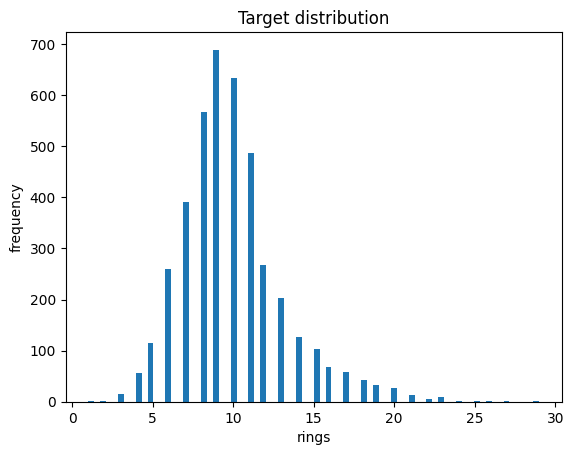

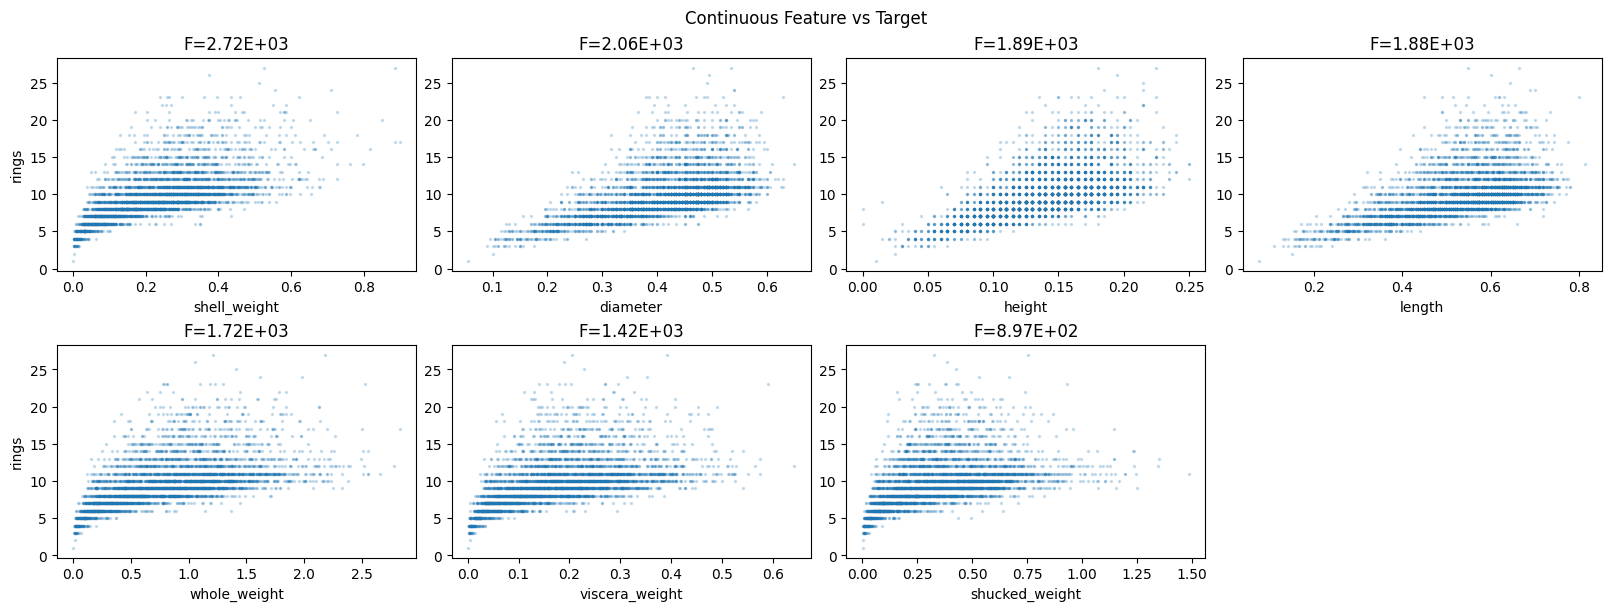

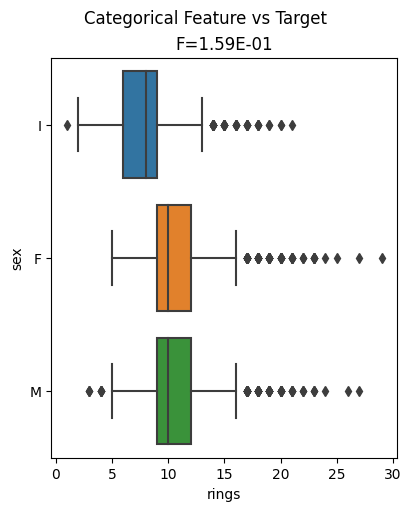

In [10]:
dabl.plot(df, 'rings');

In [11]:
X = df.drop('rings', axis=1).values
y = df.rings.values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
model = dabl.SimpleRegressor().fit(X_train, y_train)

Running DummyRegressor()
r2: -0.001 neg_mean_squared_error: -10.435
=== new best DummyRegressor() (using r2):
r2: -0.001 neg_mean_squared_error: -10.435

Running DecisionTreeRegressor(max_depth=1)
r2: 0.274 neg_mean_squared_error: -7.568
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.274 neg_mean_squared_error: -7.568

Running DecisionTreeRegressor(max_depth=5)
r2: 0.459 neg_mean_squared_error: -5.609
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.459 neg_mean_squared_error: -5.609

Running Ridge(alpha=10)
r2: 0.520 neg_mean_squared_error: -5.013
=== new best Ridge(alpha=10) (using r2):
r2: 0.520 neg_mean_squared_error: -5.013

Running Lasso(alpha=10)
r2: -0.001 neg_mean_squared_error: -10.435

Best model:
Ridge(alpha=10)
Best Scores:
r2: 0.520 neg_mean_squared_error: -5.013
